<a href="https://colab.research.google.com/github/SachithraDewmini/Cancer-prediction-using-ML/blob/shashiki/Cancerprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier


In [8]:
# Importing the dataset and reading it into a DataFrame
path ='/content/drive/MyDrive/Cancer_Prediction/CancerData.csv'

cancer_data = pd.read_csv(path)

In [9]:
# Display all columns of the DataFrame
pd.set_option('display.max_columns', None)
# Display the first few rows of the dataset
cancer_data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# Drop the 'id' column as it is not needed for the analysis
cancer_data.drop('id', axis=1, inplace=True)


In [11]:
# Encode the 'diagnosis' column (B -> 0, M -> 1)
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
cancer_data['diagnosis']= le.fit_transform(cancer_data['diagnosis'])


In [12]:
# Display the first few rows after encoding
cancer_data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# Display the normalized value counts of the 'diagnosis' column
cancer_data['diagnosis'].value_counts(normalize= True)


diagnosis
1    0.5
0    0.5
Name: proportion, dtype: float64

In [14]:
# Display information about the dataset
cancer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                712 non-null    int64  
 1   radius_mean              712 non-null    float64
 2   texture_mean             712 non-null    float64
 3   perimeter_mean           712 non-null    float64
 4   area_mean                712 non-null    float64
 5   smoothness_mean          712 non-null    float64
 6   compactness_mean         712 non-null    float64
 7   concavity_mean           712 non-null    float64
 8   concave points_mean      712 non-null    float64
 9   symmetry_mean            712 non-null    float64
 10  fractal_dimension_mean   712 non-null    float64
 11  radius_se                712 non-null    float64
 12  texture_se               712 non-null    float64
 13  perimeter_se             712 non-null    float64
 14  area_se                  7

In [15]:
# Display the value counts of a specified column
cancer_data['diagnosis'].value_counts()


diagnosis
1    356
0    356
Name: count, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

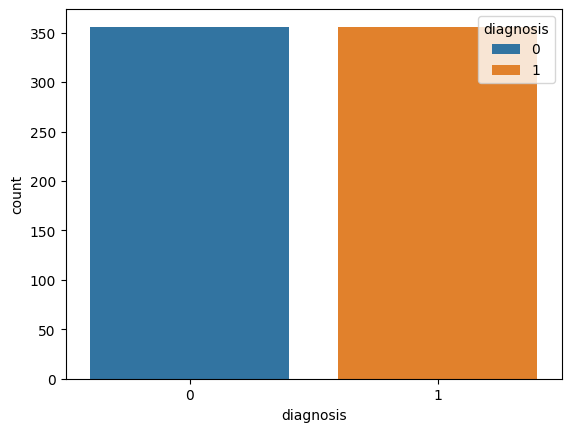

In [16]:
# Plotting the countplot
sns.countplot(x='diagnosis',hue='diagnosis',data=cancer_data)

In [17]:
# Drop the 'Unnamed: 32' column as it is not needed for the analysis
if 'Unnamed: 32' in cancer_data.columns:
    cancer_data.drop('Unnamed: 32', axis=1, inplace=True)
else:
    print("Column 'Unnamed: 32' does not exist in the DataFrame.")

Column 'Unnamed: 32' does not exist in the DataFrame.


In [18]:

# Display the columns of the dataset
cancer_data.columns


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [19]:
# Display the shape of the dataset
cancer_data.shape
# Display the summary statistics of the dataset
cancer_data.describe()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,0.500000,14.446642,19.675435,94.455702,682.574579,0.098500,0.116231,0.102558,0.055566,0.185491,0.063964,0.426338,1.221710,3.071750,43.129801,0.006956,0.028308,0.034233,0.012643,0.021047,0.004145,16.791678,26.377865,111.266713,930.719663,0.135993,0.298034,0.314579,0.128542,0.304784,0.089439
std,0.500351,3.469251,4.300132,23.924334,345.665344,0.015270,0.060721,0.082594,0.039269,0.029184,0.008511,0.270925,0.573739,2.126059,43.842216,0.002853,0.019640,0.029011,0.006697,0.009126,0.002797,4.702405,6.248635,32.878319,551.555134,0.024973,0.204013,0.232955,0.068242,0.076030,0.025606
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.997500,16.570000,77.580000,442.650000,0.086847,0.069422,0.033708,0.023203,0.163650,0.057807,0.245050,0.855925,1.778000,19.210000,0.005229,0.013767,0.016882,0.008389,0.014998,0.002334,13.340000,21.835000,86.692500,546.600000,0.118100,0.158200,0.138850,0.073872,0.255700,0.073115
50%,0.500000,13.710000,19.610000,88.730000,578.300000,0.097440,0.103500,0.084350,0.050100,0.181950,0.061660,0.348450,1.082000,2.466000,27.230000,0.006302,0.023100,0.027910,0.011595,0.018795,0.003438,15.490000,26.295000,103.550000,740.550000,0.135650,0.231600,0.267800,0.120350,0.293050,0.082215
75%,1.000000,16.187500,22.345000,107.025000,813.175000,0.108250,0.151625,0.157800,0.081967,0.203000,0.068510,0.507900,1.428500,3.541500,50.960000,0.008113,0.037108,0.046902,0.015700,0.023127,0.005043,19.850000,30.730000,129.725000,1226.250000,0.150050,0.390300,0.423825,0.181000,0.328450,0.099400
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [20]:
# Compute and display the correlation matrix of selected columns with a heatmap
cancer_data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']].corr().style.background_gradient(cmap='coolwarm')


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.659913,0.414065,0.681609,0.633985,0.387318,0.594015,0.682982,0.758796,0.386166,0.127563,0.526497,0.003336,0.505029,0.501903,-0.084043,0.347629,0.281596,0.412133,0.052704,0.181335,0.723725,0.461553,0.736034,0.673125,0.438203,0.564228,0.635224,0.790223,0.455214,0.389694
radius_mean,0.659913,1.000000,0.272269,0.996923,0.988642,0.085502,0.382083,0.598111,0.768726,0.125134,-0.288258,0.691163,-0.051075,0.667275,0.750584,-0.219487,0.167462,0.203222,0.409621,-0.087891,-0.007704,0.963598,0.213428,0.957878,0.939275,0.021535,0.222468,0.385152,0.657305,0.052469,-0.064547
texture_mean,0.414065,0.272269,1.000000,0.283618,0.262263,0.005155,0.242945,0.285619,0.263873,0.125802,0.009488,0.209625,0.385195,0.231866,0.192881,-0.051232,0.245036,0.182660,0.199051,0.040470,0.127988,0.286473,0.901751,0.299013,0.267371,0.078732,0.285339,0.312131,0.278938,0.139055,0.187029
perimeter_mean,0.681609,0.996923,0.283618,1.000000,0.985884,0.133720,0.447885,0.650222,0.807528,0.175903,-0.224686,0.706925,-0.031058,0.694195,0.761404,-0.203603,0.227298,0.247378,0.450651,-0.053230,0.044509,0.962919,0.226245,0.964927,0.937670,0.061193,0.277894,0.434512,0.695442,0.092636,-0.010517
area_mean,0.633985,0.988642,0.262263,0.985884,1.000000,0.084535,0.367379,0.600784,0.765395,0.120048,-0.276107,0.736120,-0.030317,0.705356,0.805513,-0.166149,0.163954,0.211218,0.400982,-0.066353,0.003597,0.955717,0.195697,0.949308,0.953864,0.018829,0.196318,0.366880,0.632322,0.029333,-0.077320
smoothness_mean,0.387318,0.085502,0.005155,0.133720,0.084535,1.000000,0.710748,0.585274,0.577885,0.638401,0.683435,0.251461,0.030132,0.233611,0.186777,0.284611,0.421833,0.284833,0.328728,0.265703,0.361910,0.159553,0.090224,0.193725,0.139107,0.846743,0.595638,0.540792,0.577038,0.564860,0.601393
compactness_mean,0.594015,0.382083,0.242945,0.447885,0.367379,0.710748,1.000000,0.886302,0.813075,0.703464,0.703400,0.446916,0.129750,0.516625,0.394356,0.086819,0.803621,0.597404,0.626825,0.364907,0.625047,0.428770,0.274148,0.497972,0.392435,0.611731,0.863232,0.820270,0.816441,0.633491,0.738664
concavity_mean,0.682982,0.598111,0.285619,0.650222,0.600784,0.585274,0.886302,1.000000,0.924221,0.585995,0.458421,0.595499,0.095490,0.617024,0.575947,0.083783,0.708783,0.705978,0.656615,0.260864,0.528810,0.623080,0.292089,0.677188,0.602376,0.503511,0.742967,0.868541,0.869868,0.496256,0.557889
concave points_mean,0.758796,0.768726,0.263873,0.807528,0.765395,0.577885,0.813075,0.924221,1.000000,0.535953,0.283234,0.692201,0.049058,0.691347,0.678841,0.013224,0.540274,0.480394,0.624489,0.182780,0.350620,0.791164,0.258790,0.825437,0.764701,0.465810,0.622579,0.725834,0.908312,0.432626,0.396199
symmetry_mean,0.386166,0.125134,0.125802,0.175903,0.120048,0.638401,0.703464,0.585995,0.535953,1.000000,0.607960,0.313482,0.167486,0.354460,0.225128,0.139229,0.544535,0.400898,0.447284,0.512760,0.449610,0.174104,0.133086,0.226347,0.151204,0.498488,0.566350,0.510251,0.516727,0.726043,0.518200


In [21]:
# Select relevant columns and compute the correlation matrix with a heatmap
relevant= cancer_data[['diagnosis', 'fractal_dimension_mean', 'concave points_worst', 'radius_worst','perimeter_worst',	'area_worst', 'perimeter_mean', 'area_mean', 'radius_mean' ]]
relevant.corr().style.background_gradient(cmap='coolwarm')


,diagnosis,fractal_dimension_mean,concave points_worst,radius_worst,perimeter_worst,area_worst,perimeter_mean,area_mean,radius_mean
diagnosis,1.000000,0.127563,0.790223,0.723725,0.736034,0.673125,0.681609,0.633985,0.659913
fractal_dimension_mean,0.127563,1.000000,0.333994,-0.213304,-0.152108,-0.217433,-0.224686,-0.276107,-0.288258
concave points_worst,0.790223,0.333994,1.000000,0.726485,0.760793,0.680888,0.695442,0.632322,0.657305
radius_worst,0.723725,-0.213304,0.726485,1.000000,0.991343,0.984861,0.962919,0.955717,0.963598
perimeter_worst,0.736034,-0.152108,0.760793,0.991343,1.000000,0.974899,0.964927,0.949308,0.957878
area_worst,0.673125,-0.217433,0.680888,0.984861,0.974899,1.000000,0.937670,0.953864,0.939275
perimeter_mean,0.681609,-0.224686,0.695442,0.962919,0.964927,0.937670,1.000000,0.985884,0.996923
area_mean,0.633985,-0.276107,0.632322,0.955717,0.949308,0.953864,0.985884,1.000000,0.988642
radius_mean,0.659913,-0.288258,0.657305,0.963598,0.957878,0.939275,0.996923,0.988642,1.000000


In [23]:

# Define features (X) and target (y)
X= cancer_data[['fractal_dimension_mean', 'concave points_worst', 'perimeter_worst']]
y= cancer_data['diagnosis']